In [109]:
import pandas as pd

In [110]:
# Upload data from .csv created in the previous step
data = pd.read_csv('covid.csv', index_col = 0)

# Print first 5 rows of the data table to see the data structure
data.head()

,Name,Address,Upřesnění polohy,Telefon,Příjem,Cena za samoodběr,Způsob rezervace,Odkaz na rezervační systém,DRIVE-IN,Calendar
0,#NaŽádanku.cz – Odběrové centrum Praha 15 (H. ...,"Park na křižovatce ulic Ravennská a Milánská, ...",Zelené oplocení v parku na křižovatce ulic Rav...,4.207746e+11,Osoby se žádánkou (od lékaře/KHS),NaN,Přes webové stránky na přesný čas,www.nazadanku.cz,Ne,Út 31.8. Maximální kapacita St 1.9. Vo...
1,#Vyšetři.mě – Odběrové centrum Praha 15 (H. Mě...,"Park na křižovatce ulic Ravennská a Milánská, ...",Zelené oplocení v parku na křižovatce ulic Rav...,4.207712e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,www.vysetri.me,Ne,Út 31.8. Maximální kapacita St 1.9. Vo...
2,#Vyšetři.mě – Odběrové centrum Praha 6 (Ruzyně),Drnovská 1112/60 161 00 Praha 6 - Ruzyně,Příjezdová cesta zezadu budovy (naproti adrese...,4.207712e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,www.vysetri.me,Ano,Út 31.8. Maximální kapacita St 1.9. Vo...
3,AESKULAB - odběrové místo VIVO Hostivař,"Praha 10, Švehlova 1391/32","Odběrové místo - OC VIVO Hostivař, parkoviště",4.208007e+11,Osoby se žádankou i samoplátce,NaN,www.rezervace.aeskulab.cz,rezervace.aeskulab.cz,Ne,Út 31.8. Žádná data St 1.9. Žádná data...
4,"AESKULAB Praha 6 - OM poliklinika DAM, Brixiho","Brixiho 1968/1, 162 00 Praha 6 - Břevnov","Poliklinika DAM, samostatný vchod vpravo z Bri...",4.208007e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,rezervace.aeskulab.cz,Ne,Út 31.8. Žádná data St 1.9. Volná kapa...


As seen above, the scraped data is not really structured as needed for further analysis. The Calendar column is especially important since it contains the data we want to analyze but before the analysis can start, the Calendar strings need to be processed and relevant information then needs to be stored in new columns.

In [111]:

from time import sleep
from tqdm import tqdm


In [112]:
# Define new list variable, which should contain list of capacity strings for each day
# Obtained data is stored in a list of lists for easier iteration in next steps
next_week_capacity = []

def getCapacityFromString():
    
    calendar_list = data['Calendar'].tolist()
    
    i=0
    for i in tqdm(range(len(calendar_list))):
        j=1
        list_of_capacities = []
        for j in range(1,8): 
            list_of_capacities.append(calendar_list[i].split('.   ')[j].split('     ')[0])
            j+1
        next_week_capacity.append(list_of_capacities)
        i+1
    print(next_week_capacity[:5])
        
        

In [113]:
getCapacityFromString()

100%|██████████| 382/382 [00:00<00:00, 47118.70it/s]

[['Maximální kapacita', 'Volná kapacita 79 z 140', 'Volná kapacita 298 z 353', 'Volná kapacita 268 z 295', 'Volná kapacita 329 z 345', 'Volná kapacita 306 z 322', 'Volná kapacita 147 z 153'], ['Maximální kapacita', 'Volná kapacita 121 z 123', 'Volná kapacita 132 z 137', 'Volná kapacita 192 z 193', 'Volná kapacita 145 z 145', 'Volná kapacita 150 z 156', 'Volná kapacita 111 z 111'], ['Maximální kapacita', 'Volná kapacita 103 z 104', 'Volná kapacita 102 z 106', 'Volná kapacita 97 z 103', 'Volná kapacita 128 z 131', 'Volná kapacita 128 z 131', 'Volná kapacita 105 z 105'], ['Žádná data', 'Žádná data', 'Žádná data', 'Žádná data', 'Zavřeno', 'Žádná data', 'Žádná data'], ['Žádná data', 'Volná kapacita22 z 105', 'Volná kapacita23 z 105', 'Volná kapacita30 z 105', 'Zavřeno', 'Zavřeno', 'Volná kapacita27 z 105']]


In [114]:
# Add previously created lists as new columns in the data DF

data_2 = data
data_2['next_week_capacity'] = next_week_capacity

data_2.head()

,Name,Address,Upřesnění polohy,Telefon,Příjem,Cena za samoodběr,Způsob rezervace,Odkaz na rezervační systém,DRIVE-IN,Calendar,next_week_capacity
0,#NaŽádanku.cz – Odběrové centrum Praha 15 (H. ...,"Park na křižovatce ulic Ravennská a Milánská, ...",Zelené oplocení v parku na křižovatce ulic Rav...,4.207746e+11,Osoby se žádánkou (od lékaře/KHS),NaN,Přes webové stránky na přesný čas,www.nazadanku.cz,Ne,Út 31.8. Maximální kapacita St 1.9. Vo...,"[Maximální kapacita, Volná kapacita 79 z 140, ..."
1,#Vyšetři.mě – Odběrové centrum Praha 15 (H. Mě...,"Park na křižovatce ulic Ravennská a Milánská, ...",Zelené oplocení v parku na křižovatce ulic Rav...,4.207712e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,www.vysetri.me,Ne,Út 31.8. Maximální kapacita St 1.9. Vo...,"[Maximální kapacita, Volná kapacita 121 z 123,..."
2,#Vyšetři.mě – Odběrové centrum Praha 6 (Ruzyně),Drnovská 1112/60 161 00 Praha 6 - Ruzyně,Příjezdová cesta zezadu budovy (naproti adrese...,4.207712e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,www.vysetri.me,Ano,Út 31.8. Maximální kapacita St 1.9. Vo...,"[Maximální kapacita, Volná kapacita 103 z 104,..."
3,AESKULAB - odběrové místo VIVO Hostivař,"Praha 10, Švehlova 1391/32","Odběrové místo - OC VIVO Hostivař, parkoviště",4.208007e+11,Osoby se žádankou i samoplátce,NaN,www.rezervace.aeskulab.cz,rezervace.aeskulab.cz,Ne,Út 31.8. Žádná data St 1.9. Žádná data...,"[Žádná data, Žádná data, Žádná data, Žádná dat..."
4,"AESKULAB Praha 6 - OM poliklinika DAM, Brixiho","Brixiho 1968/1, 162 00 Praha 6 - Břevnov","Poliklinika DAM, samostatný vchod vpravo z Bri...",4.208007e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,rezervace.aeskulab.cz,Ne,Út 31.8. Žádná data St 1.9. Volná kapa...,"[Žádná data, Volná kapacita22 z 105, Volná kap..."


In [115]:
# So far we have a data structure where each testing center has 
# its list of next week capacities, where strings with information for each day are stored.
# The following function iterates over all daily capacities of all test centers and creates
# a list of 2 numerical values: free and total capacities of the center for certain day.


def getNumericalCapacities():

    numericalCapacitiesList = []    
    i = 0
    for i in tqdm(range(len(next_week_capacity))):
            j=0
            valuesForTheWeek = []
            for j in range(0,7):
                textCapacityForDay = next_week_capacity[i][j]
                if (textCapacityForDay.startswith('Volná kapacita')):
                    nums_list = [int(k) for k in textCapacityForDay.split() if k.isdigit()]

                else:
                    nums_list = [0,0]
                    
                # Convert string data to integers
                nums_list = list(map(int, nums_list))
                
                valuesForTheWeek.append(nums_list)
                j+1
            numericalCapacitiesList.append(valuesForTheWeek)
            i+1


In [116]:
# Call the function
getNumericalCapacities()

100%|██████████| 382/382 [00:00<00:00, 49871.58it/s]


In [117]:
# Add previously created list with numerical capacity values as new columns in the data DF

data_2 = data
data_2['num_capacities_per_day'] = numericalCapacitiesList

data_2.head()

,Name,Address,Upřesnění polohy,Telefon,Příjem,Cena za samoodběr,Způsob rezervace,Odkaz na rezervační systém,DRIVE-IN,Calendar,next_week_capacity,num_capacities_per_day
0,#NaŽádanku.cz – Odběrové centrum Praha 15 (H. ...,"Park na křižovatce ulic Ravennská a Milánská, ...",Zelené oplocení v parku na křižovatce ulic Rav...,4.207746e+11,Osoby se žádánkou (od lékaře/KHS),NaN,Přes webové stránky na přesný čas,www.nazadanku.cz,Ne,Út 31.8. Maximální kapacita St 1.9. Vo...,"[Maximální kapacita, Volná kapacita 79 z 140, ...","[[0, 0], [79, 140], [298, 353], [268, 295], [3..."
1,#Vyšetři.mě – Odběrové centrum Praha 15 (H. Mě...,"Park na křižovatce ulic Ravennská a Milánská, ...",Zelené oplocení v parku na křižovatce ulic Rav...,4.207712e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,www.vysetri.me,Ne,Út 31.8. Maximální kapacita St 1.9. Vo...,"[Maximální kapacita, Volná kapacita 121 z 123,...","[[0, 0], [121, 123], [132, 137], [192, 193], [..."
2,#Vyšetři.mě – Odběrové centrum Praha 6 (Ruzyně),Drnovská 1112/60 161 00 Praha 6 - Ruzyně,Příjezdová cesta zezadu budovy (naproti adrese...,4.207712e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,www.vysetri.me,Ano,Út 31.8. Maximální kapacita St 1.9. Vo...,"[Maximální kapacita, Volná kapacita 103 z 104,...","[[0, 0], [103, 104], [102, 106], [97, 103], [1..."
3,AESKULAB - odběrové místo VIVO Hostivař,"Praha 10, Švehlova 1391/32","Odběrové místo - OC VIVO Hostivař, parkoviště",4.208007e+11,Osoby se žádankou i samoplátce,NaN,www.rezervace.aeskulab.cz,rezervace.aeskulab.cz,Ne,Út 31.8. Žádná data St 1.9. Žádná data...,"[Žádná data, Žádná data, Žádná data, Žádná dat...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
4,"AESKULAB Praha 6 - OM poliklinika DAM, Brixiho","Brixiho 1968/1, 162 00 Praha 6 - Břevnov","Poliklinika DAM, samostatný vchod vpravo z Bri...",4.208007e+11,Osoby se žádankou i samoplátce,NaN,Přes webové stránky,rezervace.aeskulab.cz,Ne,Út 31.8. Žádná data St 1.9. Volná kapa...,"[Žádná data, Volná kapacita22 z 105, Volná kap...","[[0, 0], [105], [105], [105], [0, 0], [0, 0], ..."


As we take a look at according next_week_capacity and num_capacities_per_day columns, we can comment that numerical values were extracted correctly.

Now it's time to prepare summaries from data we obtained and display them in a chart.

In [208]:
# function getTotalCapacitiesToDisplay returns two lists: freeSpotsPerDay and totalSpotsPerDay.
# Each of these lists consist of 7 elements, each representing sum of capacities (free and total) for each day

def getTotalCapacitiesToDisplay():

    freeSpotsPerDay = [0,0,0,0,0,0,0]
    totalSpotsPerDay = [0,0,0,0,0,0,0]
    faultCellsCounter = 0
    totalCapacitiesCounter = 0
    i = 0

    for i in range(len(numericalCapacitiesList)):
        j = 0
        for j in range (0,7):
            totalCapacitiesCounter += 1
            # Preventing fault capacities of the day (one value only instead of two)
            if (len(numericalCapacitiesList[i][j]) == 2):
                freeSpotsPerDay[j] += numericalCapacitiesList[i][j][0]
                totalSpotsPerDay[j] += numericalCapacitiesList[i][j][1]
            else:
                faultCellsCounter += 1

            j += 1
        i+= 1

    print(freeSpotsPerDay)
    print(totalSpotsPerDay)
    print('Total of capacity cells excluded: ' + str(faultCellsCounter) + ' out of ' + str(totalCapacitiesCounter))


In [209]:
getTotalCapacitiesToDisplay()

[12794, 27291, 28382, 27210, 16233, 15535, 31704]
[17751, 31655, 32511, 31083, 17166, 16251, 33769]
Total of capacity cells excluded: 124 out of 2674


In [211]:
#Fault capacities => one value only instead of two 
i = 0

for i in range(len(numericalCapacitiesList)):
    j = 0
    for j in range (0,7):
        
        if (len(numericalCapacitiesList[i][j]) != 2):
            print(numericalCapacitiesList[i][j])
        else:
            pass
            
        j += 1
    i+= 1
    

[105]
[105]
[105]
[105]
[34]
[1532]
[1532]
[1532]
[1532]
[1532]
[1532]
[84]
[84]
[84]
[84]
[84]
[360]
[62]
[60]
[200]
[80]
[88]
[110]
[60]
[162]
[162]
[168]
[168]
[162]
[162]
[114]
[56]
[89]
[49]
[58]
[48]
[69]
[630]
[180]
[75]
[315]
[270]
[429]
[108]
[108]
[108]
[108]
[108]
[108]
[48]
[240]
[240]
[240]
[240]
[240]
[16]
[804]
[44]
[44]
[44]
[63]
[62]
[63]
[39]
[61]
[61]
[39]
[160]
[160]
[160]
[100]
[156]
[156]
[1296]
[378]
[136]
[216]
[519]
[351]
[351]
[351]
[585]
[252]
[60]
[48]
[600]
[390]
[75]
[90]
[60]
[71]
[72]
[38]
[76]
[86]
[75]
[145]
[80]
[255]
[255]
[140]
[176]
[176]
[240]
[24]
[91]
[60]
[60]
[60]
[80]
[90]
[80]
[165]
[260]
[90]
[75]
[75]
[184]
[184]
[184]
[184]
[72]
[72]
[8]


In [214]:

bookedSpotsPerDay = []


zip_object = zip(totalSpotsPerDay, freeSpotsPerDay)
for totalSpotsPerDay_i, freeSpotsPerDay_i in zip_object:
    bookedSpotsPerDay.append(totalSpotsPerDay_i-freeSpotsPerDay_i)

print(bookedSpotsPerDay)

[4957, 4364, 4129, 3873, 933, 716, 2065]


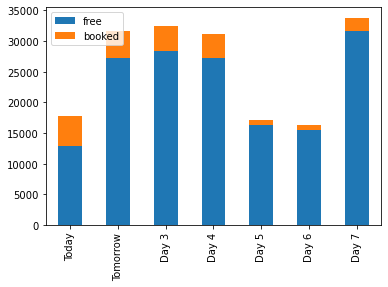

In [219]:
# Stacked column representing free capacities out of total capacities defined for each day

free = freeSpotsPerDay
booked = bookedSpotsPerDay
day = ["Today","Tomorrow","Day 3","Day 4","Day 5","Day 6","Day 7"]
df = pd.DataFrame({'free': free,
                   'booked': booked}, index=day)
ax = df.plot.bar(stacked=True)

As seen in the chart returned, the total capacity for each day (represented by height of columns) is not distributed evenly for day. 

There are two reasons for this behaviour:

Firstly, the total capacity during weekends is not as high as in work days due to testing centers being closed for the weekend.
Secondly, the column representing data for today might be lower than for following days due to the format data is displayed on calendar part of scraped webpages, meaning that when the testing center has its capacity full, the only information displayed is "Maximalni kapacita", which does not give us any information about the capacity for the day. Apparently, many testing capacities are booked for near future, probably for the same day.

Othewise, we can comment (at least for data obtained during the script creation) that total amount of free spots in the Czech Republic is over 10.000 for each day. Therefore, we can conclude that the testing capacity might be sufficient, even though there still remains a question whether testing capacities are distributed evenly across regions and cities.